In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
import itertools
from sklearn.model_selection import train_test_split
from scipy.stats import expon, randint, uniform, loguniform
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import precision_recall_curve, average_precision_score
from itertools import cycle
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv("/content/student-mat-ses-grouped.csv")
data.head()

In [3]:
# binning grades
def categorize_grade(grade):
    if grade <= 10:
        return 'Fail'
    else:
        return 'Pass'

data['Grade_Category'] = data['G3'].apply(categorize_grade)



In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,SES_Score,SES_Group,Grade_Category
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,27,Upper-Middle SES,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,22,Low SES,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,24,Lower-Middle SES,Fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,30,High SES,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,26,Lower-Middle SES,Fail


In [5]:
# Define scores for various attributes
occupation_scores = {
    'teacher': 4,
    'health': 3,
    'services': 2,
    'at_home': 1,
    'other': 1
}

address_scores = {
    'U': 2,
    'R': 1
}

famsize_scores = {
    'GT3': 1,
    'LE3': 2
}

pstatus_scores = {
    'T': 2,
    'A': 1
}


traveltime_scores = {
    1: 4,
    2: 3,
    3: 2,
    4: 1
}


Sesorder_scores = {
    'High SES': 4,
    'Upper-Middle SES': 3,
    'Lower-Middle SES': 2,
    'Low SES': 1
}


In [6]:
data['Mjob'] = data['Mjob'].map(occupation_scores)
data['Fjob'] = data['Fjob'].map(occupation_scores)
data['traveltime'] = data['traveltime'].map(traveltime_scores)
data['Pstatus'] = data['Pstatus'].map(pstatus_scores)
data['address'] = data['address'].map(address_scores)
data['SES_Group'] = data['SES_Group'].map(Sesorder_scores)
data['famsize'] = data['famsize'].map(famsize_scores)

In [7]:
binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for column in binary_columns:
    data[column] = data[column].replace({'yes': 2, 'no': 1})


In [8]:
grade_encoded = {'Fail': 0, 'Pass': 1 }
data["Grade_Category"] = data["Grade_Category"].map(grade_encoded)

In [9]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,SES_Score,SES_Group,Grade_Category
0,GP,F,18,2,1,1,4,4,1,4,...,1,1,3,6,5,6,6,27,3,0
1,GP,F,17,2,1,2,1,1,1,1,...,1,1,3,4,5,5,6,22,1,0
2,GP,F,15,2,2,2,1,1,1,1,...,2,3,3,10,7,8,10,24,2,0
3,GP,F,15,2,1,2,4,2,3,2,...,1,1,5,2,15,14,15,30,4,1
4,GP,F,16,2,1,2,3,3,1,1,...,1,2,5,4,6,10,10,26,2,0


In [ ]:
data = data.drop(['G1', 'G2', 'G3'], axis=1)


In [ ]:
nominal_features = ['school', 'sex', 'reason', 'guardian']
num_features = ['age', 'famsize', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'SES_Score', 'SES_Group']

In [ ]:
data.head()

In [ ]:
# Create polynomial features & store in a DF
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
poly_features_array = poly_transformer.fit_transform(data[num_features])
poly_feature_names = poly_transformer.get_feature_names_out(num_features)
poly_features_df = pd.DataFrame(poly_features_array, columns=poly_feature_names)
data_enhanced = pd.concat([data, poly_features_df], axis=1)

In [ ]:
# encode cat features and get feature importances
one_hot_encoder = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(sparse=False, drop='first'), nominal_features)
], remainder='passthrough')
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('encoder', one_hot_encoder), ('classifier', rf_classifier)])

# Define features (X) and target (y)
X = data_enhanced.drop(columns='Grade_Category')
y = data_enhanced['Grade_Category']
pipeline.fit(X, y)

feature_importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = pipeline.named_steps['encoder'].get_feature_names_out()
feature_names = np.array([name.split('__')[-1] for name in feature_names])

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


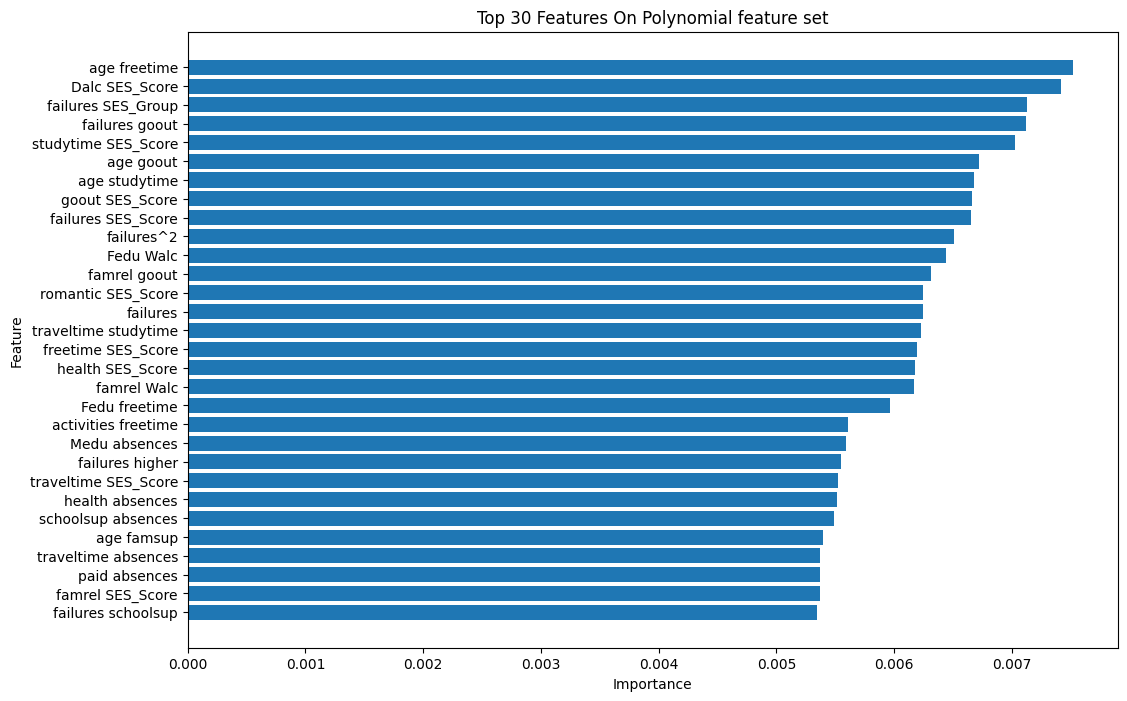

In [ ]:
top_features = feature_importance_df.head(30)

plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Features On Polynomial feature set')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# function to evaluate models
def evaluate_model(model, model_name, X_train, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))
    y_pred_prob = model.predict_proba(X_test)
    print(f'{model_name} Prediction Probabilities (First 5 Predictions):')
    print(y_pred_prob[:5])
    print('-' * 50)

In [ ]:
# evaluate Grid and Randomised search
def evaluate_search(search_obj, search_type, X_test, y_test):
    print(f"Best parameters found by {search_type}: ", search_obj.best_params_)
    best_model = search_obj.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of the best model: {accuracy}')
    print(f'Classification Report of the best model ({search_type}):')
    print(classification_report(y_test, y_pred))
    y_pred_prob = best_model.predict_proba(X_test)
    print(f'Prediction Probabilities (First 5 Predictions) of the best model ({search_type}):')
    print(y_pred_prob[:5])
    print('-' * 50)

In [ ]:
# retrain rf model with the top 30 features
top_30_features = feature_importance_df.head(30)['Feature']

X_transformed = one_hot_encoder.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)
X_top_30 = X_transformed_df[top_30_features]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top_30, y, test_size=0.2, random_state=42)
rf_classifier_top_30 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_top_30.fit(X_train2, y_train2)


In [ ]:
evaluate_model(rf_classifier_top_30, "RF", X_train2, X_test2, y_test2)

RF Accuracy: 0.6835443037974683
RF Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.65      0.83      0.73        41

    accuracy                           0.68        79
   macro avg       0.70      0.68      0.67        79
weighted avg       0.70      0.68      0.68        79

RF Prediction Probabilities (First 5 Predictions):
[[0.87 0.13]
 [0.69 0.31]
 [0.53 0.47]
 [0.72 0.28]
 [0.76 0.24]]
--------------------------------------------------


In [ ]:
# Refined parameter grid
refined_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 8, 10, 12],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}
rf = RandomForestClassifier(random_state=42)
refined_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=refined_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring = 'accuracy')

refined_grid_search.fit(X_train2, y_train2)

In [ ]:
evaluate_search(refined_grid_search, "RS (RF)", X_test2, y_test2)

Best parameters found by RS (RF):  {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the best model: 0.6962025316455697
Classification Report of the best model (RS (RF)):
              precision    recall  f1-score   support

           0       0.77      0.53      0.62        38
           1       0.66      0.85      0.74        41

    accuracy                           0.70        79
   macro avg       0.71      0.69      0.68        79
weighted avg       0.71      0.70      0.69        79

Prediction Probabilities (First 5 Predictions) of the best model (RS (RF)):
[[0.86292857 0.13707143]
 [0.6287676  0.3712324 ]
 [0.51242057 0.48757943]
 [0.63858333 0.36141667]
 [0.8775     0.1225    ]]
--------------------------------------------------


In [ ]:
rf_pipeline = ImbPipeline([
    # ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])
param_grid_rf2 = {
    'rf__max_depth': [10, 12, 14],
    'rf__min_samples_leaf': [1, 2, 3],
    'rf__min_samples_split': [2, 3],
    'rf__n_estimators': [50, 100, 150]
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search_rf2 = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid_rf2,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)
grid_search_rf2.fit(X_train2, y_train2)

In [ ]:
evaluate_search(grid_search_rf2, "RS (RF)", X_test2, y_test2)

Best parameters found by RS (RF):  {'rf__max_depth': 12, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Accuracy of the best model: 0.7088607594936709
Classification Report of the best model (RS (RF)):
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        38
           1       0.69      0.80      0.74        41

    accuracy                           0.71        79
   macro avg       0.71      0.71      0.70        79
weighted avg       0.71      0.71      0.71        79

Prediction Probabilities (First 5 Predictions) of the best model (RS (RF)):
[[0.8690754  0.1309246 ]
 [0.75488853 0.24511147]
 [0.48463781 0.51536219]
 [0.70651948 0.29348052]
 [0.84185714 0.15814286]]
--------------------------------------------------


In [ ]:
param_dist_rf = {
    'rf__max_depth': randint(10, 15),
    'rf__min_samples_leaf': randint(1, 5),
    'rf__min_samples_split': randint(2, 5),
    'rf__n_estimators': randint(80, 120)
}

random_search_rf = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy',
    random_state=42
)
random_search_rf.fit(X_train2, y_train2)


In [ ]:
evaluate_search(random_search_rf, "RS (RF)", X_test2, y_test2)

Best parameters found by RS (RF):  {'rf__max_depth': 12, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 4, 'rf__n_estimators': 94}
Accuracy of the best model: 0.6835443037974683
Classification Report of the best model (RS (RF)):
              precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.65      0.83      0.73        41

    accuracy                           0.68        79
   macro avg       0.70      0.68      0.67        79
weighted avg       0.70      0.68      0.68        79

Prediction Probabilities (First 5 Predictions) of the best model (RS (RF)):
[[0.87251773 0.12748227]
 [0.70733479 0.29266521]
 [0.49198904 0.50801096]
 [0.67130342 0.32869658]
 [0.79751773 0.20248227]]
--------------------------------------------------


In [ ]:
param_dist_rf_adjusted = {
    'rf__n_estimators': randint(50, 200),
    'rf__max_depth': [10, 12, 15, 20, None],
    'rf__min_samples_split': randint(2, 10),
    'rf__min_samples_leaf': randint(1, 5),
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search_rf_stratified = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist_rf_adjusted,
    n_iter=100,
    cv=stratified_kfold,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

random_search_rf_stratified.fit(X_train2, y_train2)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'rf__max_depth': [10, 12, 15, 20, None],
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d13b317a740>,
                                        'rf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d13b317a2c0>,
                                        'rf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d13b2dc2e60>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
evaluate_search(random_search_rf_stratified, "RS (RF)", X_test2, y_test2)

Best parameters found by RS (RF):  {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 87}
Accuracy of the best model: 0.7088607594936709
Classification Report of the best model (RS (RF)):
              precision    recall  f1-score   support

           0       0.76      0.58      0.66        38
           1       0.68      0.83      0.75        41

    accuracy                           0.71        79
   macro avg       0.72      0.70      0.70        79
weighted avg       0.72      0.71      0.70        79

Prediction Probabilities (First 5 Predictions) of the best model (RS (RF)):
[[0.84806222 0.15193778]
 [0.58925835 0.41074165]
 [0.52065677 0.47934323]
 [0.63796438 0.36203562]
 [0.86496077 0.13503923]]
--------------------------------------------------


## LR

In [ ]:
logreg_classifier = LogisticRegression(max_iter=5000)
logreg_classifier.fit(X_train2, y_train2)
evaluate_model(logreg_classifier, "LR", X_train2, X_test2, y_test2)


LR Accuracy: 0.6455696202531646
LR Classification Report:
              precision    recall  f1-score   support

        Fail       0.69      0.47      0.56        38
        Pass       0.62      0.80      0.70        41

    accuracy                           0.65        79
   macro avg       0.66      0.64      0.63        79
weighted avg       0.66      0.65      0.63        79

LR Prediction Probabilities (First 5 Predictions):
[[0.99824099 0.00175901]
 [0.74436814 0.25563186]
 [0.71702772 0.28297228]
 [0.32181783 0.67818217]
 [0.95838334 0.04161666]]
--------------------------------------------------


In [ ]:
logreg_pipeline = ImbPipeline([
    #('scaler', StandardScaler()),
   # ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=5000, random_state=42))
])

param_grid_logreg = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

grid_search_logreg = GridSearchCV(
    logreg_pipeline,
    param_grid=param_grid_logreg,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)
grid_search_logreg.fit(X_train2, y_train2)

In [ ]:
evaluate_search(grid_search_logreg, "LR (RF)", X_test2, y_test2)

Best parameters found by LR (RF):  {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg'}
Accuracy of the best model: 0.6582278481012658
Classification Report of the best model (LR (RF)):
              precision    recall  f1-score   support

        Fail       0.74      0.45      0.56        38
        Pass       0.62      0.85      0.72        41

    accuracy                           0.66        79
   macro avg       0.68      0.65      0.64        79
weighted avg       0.68      0.66      0.64        79

Prediction Probabilities (First 5 Predictions) of the best model (LR (RF)):
[[0.91148781 0.08851219]
 [0.65655419 0.34344581]
 [0.71401815 0.28598185]
 [0.32378962 0.67621038]
 [0.930663   0.069337  ]]
--------------------------------------------------


In [ ]:
logreg_pipeline2 = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=5000, random_state=42))
])
# Define the distribution of parameters to sample from
param_dist_logreg = {
    'logreg__C': loguniform(1e-4, 1e2),
    'logreg__penalty': ['l2', 'none'],
    'smote__k_neighbors': [1, 2, 3, 4, 5]
}

random_search_logreg = RandomizedSearchCV(
    logreg_pipeline2,
    param_distributions=param_dist_logreg,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_logreg.fit(X_train2, y_train2)


In [ ]:
evaluate_search(random_search_logreg, "LR (RF)", X_test2, y_test2)

Best parameters found by LR (RF):  {'logreg__C': 0.0008022417576640368, 'logreg__penalty': 'l2', 'smote__k_neighbors': 5}
Accuracy of the best model: 0.6455696202531646
Classification Report of the best model (LR (RF)):
              precision    recall  f1-score   support

        Fail       0.81      0.34      0.48        38
        Pass       0.60      0.93      0.73        41

    accuracy                           0.65        79
   macro avg       0.71      0.63      0.61        79
weighted avg       0.70      0.65      0.61        79

Prediction Probabilities (First 5 Predictions) of the best model (LR (RF)):
[[0.66241017 0.33758983]
 [0.50671127 0.49328873]
 [0.53812535 0.46187465]
 [0.48360654 0.51639346]
 [0.64216811 0.35783189]]
--------------------------------------------------


## XGB

In [ ]:
strat_k_fold = StratifiedKFold(n_splits=5)

xgb_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

In [ ]:
#le = LabelEncoder()
#xgb_y = le.fit_transform(y_train2)
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 4, 5],
    'xgb__subsample': [0.7, 0.8, 0.9],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)
grid_search_xgb.fit(X_train2, y_train2)

In [ ]:
#le = LabelEncoder()
#xgb_yt = le.fit_transform(y_test2)
evaluate_search(grid_search_xgb, 'XGB', X_test2, y_test2)

Best parameters found by XGB:  {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 100, 'xgb__subsample': 0.9}
Accuracy of the best model: 0.6962025316455697
Classification Report of the best model (XGB):
              precision    recall  f1-score   support

           0       0.73      0.58      0.65        38
           1       0.67      0.80      0.73        41

    accuracy                           0.70        79
   macro avg       0.70      0.69      0.69        79
weighted avg       0.70      0.70      0.69        79

Prediction Probabilities (First 5 Predictions) of the best model (XGB):
[[0.9161129  0.08388709]
 [0.90244865 0.09755135]
 [0.22138876 0.77861124]
 [0.57292926 0.42707074]
 [0.941506   0.05849399]]
--------------------------------------------------


In [ ]:
param_grid_xgb_refined = {
    'xgb__n_estimators': [100, 300, 500],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search_xgb_refined = GridSearchCV(
    xgb_pipeline,
    param_grid=param_grid_xgb_refined,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search_xgb_refined.fit(X_train2, y_train2)


In [ ]:
evaluate_search(grid_search_xgb_refined, 'XGB', X_test2, y_test2)

Best parameters found by XGB:  {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 7, 'xgb__n_estimators': 300, 'xgb__subsample': 1.0}
Accuracy of the best model: 0.7088607594936709
Classification Report of the best model (XGB):
              precision    recall  f1-score   support

           0       0.78      0.55      0.65        38
           1       0.67      0.85      0.75        41

    accuracy                           0.71        79
   macro avg       0.73      0.70      0.70        79
weighted avg       0.72      0.71      0.70        79

Prediction Probabilities (First 5 Predictions) of the best model (XGB):
[[0.9816095  0.0183905 ]
 [0.96126103 0.03873894]
 [0.1980952  0.8019048 ]
 [0.6424493  0.35755068]
 [0.9745074  0.02549263]]
--------------------------------------------------


In [ ]:
param_dist_xgb = {
    'xgb__n_estimators': randint(100, 500),
    'xgb__learning_rate': uniform(0.01, 0.1),
    'xgb__max_depth': randint(3, 7),
    'xgb__subsample': uniform(0.8, 0.2),
    'xgb__colsample_bytree': uniform(0.7, 0.2)
}

random_search_xgb = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy',
    random_state=42
)

random_search_xgb.fit(X_train2, y_train2)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('smote', SMOTE(random_state=42)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=N...
                                        'xgb__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d13b2f11420>,
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d13b2f261d0>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d13b2f26e00>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d13b56b1360>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
evaluate_search(random_search_xgb, 'XGB', X_test2, y_test2)

Best parameters found by XGB:  {'xgb__colsample_bytree': 0.765308153761167, 'xgb__learning_rate': 0.06704439744053994, 'xgb__max_depth': 6, 'xgb__n_estimators': 289, 'xgb__subsample': 0.8650660661526529}
Accuracy of the best model: 0.6708860759493671
Classification Report of the best model (XGB):
              precision    recall  f1-score   support

           0       0.71      0.53      0.61        38
           1       0.65      0.80      0.72        41

    accuracy                           0.67        79
   macro avg       0.68      0.67      0.66        79
weighted avg       0.68      0.67      0.66        79

Prediction Probabilities (First 5 Predictions) of the best model (XGB):
[[0.96919197 0.03080801]
 [0.9530591  0.04694089]
 [0.30983514 0.69016486]
 [0.6946037  0.30539632]
 [0.9299167  0.07008332]]
--------------------------------------------------


## SVM

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)
svm_classifier.fit(X_train2, y_train2)

In [ ]:
evaluate_model(svm_classifier, "svm", X_train2, X_test2, y_test2)

svm Accuracy: 0.6582278481012658
svm Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        38
           1       0.63      0.80      0.71        41

    accuracy                           0.66        79
   macro avg       0.67      0.65      0.65        79
weighted avg       0.67      0.66      0.65        79

svm Prediction Probabilities (First 5 Predictions):
[[0.79662657 0.20337343]
 [0.56954564 0.43045436]
 [0.58167306 0.41832694]
 [0.40965421 0.59034579]
 [0.71612574 0.28387426]]
--------------------------------------------------


In [ ]:
svm_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    #('smote', SMOTE(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
])

In [ ]:
# Define parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__degree': [2, 3, 4],
    'svm__gamma': ['scale', 'auto']
}

# Grid search
svm_grid_search = GridSearchCV(svm_pipeline,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

svm_grid_search.fit(X_train2, y_train2)



In [ ]:
evaluate_search(svm_grid_search, 'svm', X_test2, y_test2)

Best parameters found by svm:  {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Accuracy of the best model: 0.6582278481012658
Classification Report of the best model (svm):
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        38
           1       0.63      0.80      0.71        41

    accuracy                           0.66        79
   macro avg       0.67      0.65      0.65        79
weighted avg       0.67      0.66      0.65        79

Prediction Probabilities (First 5 Predictions) of the best model (svm):
[[0.79034837 0.20965163]
 [0.55238768 0.44761232]
 [0.57812039 0.42187961]
 [0.39418004 0.60581996]
 [0.70768149 0.29231851]]
--------------------------------------------------


In [ ]:

param_distributions = {
    'svm__C': uniform(0.1, 10),
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__degree': [2, 3, 4, 5],
    'svm__gamma': ['scale', 'auto']
}
random_searchsvm = RandomizedSearchCV(
    svm_pipeline,
    param_distributions,
    n_iter=100, cv=strat_k_fold,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_searchsvm.fit(X_train2, y_train2)


In [ ]:
evaluate_search(random_searchsvm, 'svm', X_test2, y_test2)

Best parameters found by svm:  {'svm__C': 8.663242918780924, 'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'linear'}
Accuracy of the best model: 0.6582278481012658
Classification Report of the best model (svm):
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        38
           1       0.63      0.80      0.71        41

    accuracy                           0.66        79
   macro avg       0.67      0.65      0.65        79
weighted avg       0.67      0.66      0.65        79

Prediction Probabilities (First 5 Predictions) of the best model (svm):
[[0.78642617 0.21357383]
 [0.55284889 0.44715111]
 [0.5773208  0.4226792 ]
 [0.3962857  0.6037143 ]
 [0.70593655 0.29406345]]
--------------------------------------------------


## model stacking

In [ ]:
base_rf = RandomForestClassifier(random_state=42)
ada_boost_rf = AdaBoostClassifier(estimator=base_rf, random_state=42, n_estimators=50)
ada_boost_rf.fit(X_train2, y_train2)

evaluate_model(ada_boost_rf, "ada", X_train2, X_test2, y_test2)

ada Accuracy: 0.7088607594936709
ada Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.58      0.66        38
           1       0.68      0.83      0.75        41

    accuracy                           0.71        79
   macro avg       0.72      0.70      0.70        79
weighted avg       0.72      0.71      0.70        79

ada Prediction Probabilities (First 5 Predictions):
[[0.87 0.13]
 [0.66 0.34]
 [0.47 0.53]
 [0.58 0.42]
 [0.7  0.3 ]]
--------------------------------------------------


In [ ]:
ada_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('ada_boost_rf', AdaBoostClassifier(
        estimator=RandomForestClassifier(random_state=42),
        random_state=42))
])

param_dist = {
    'ada_boost_rf__n_estimators': randint(30, 100),
    'ada_boost_rf__learning_rate': [0.01, 0.1, 1]
}

random_searchada = RandomizedSearchCV(
    ada_pipeline,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_searchada.fit(X_train2, y_train2)

In [ ]:
evaluate_search(random_searchada, 'ada', X_test2, y_test2)

Best parameters found by ada:  {'ada_boost_rf__learning_rate': 1, 'ada_boost_rf__n_estimators': 81}
Accuracy of the best model: 0.7088607594936709
Classification Report of the best model (ada):
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        38
           1       0.69      0.80      0.74        41

    accuracy                           0.71        79
   macro avg       0.71      0.71      0.70        79
weighted avg       0.71      0.71      0.71        79

Prediction Probabilities (First 5 Predictions) of the best model (ada):
[[0.81 0.19]
 [0.72 0.28]
 [0.53 0.47]
 [0.7  0.3 ]
 [0.75 0.25]]
--------------------------------------------------


In [ ]:
def get_model_pred(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return y_test, y_pred, y_pred_prob

In [ ]:
def get_search_pred(search_obj, X_test, y_test):
    best_model = search_obj.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of the best model: {accuracy}')
    print("Classification Report of the best model:", {best_model})
    print(classification_report(y_test, y_pred))
    return y_test, y_pred, y_pred_prob


In [ ]:
#y_test_gs1, y_pred_gs1, y_pred_prob_gs1 = get_search_pred(grid_search_logreg, X_test2, y_test2)
y_test_gs2, y_pred_gs2, y_pred_prob_gs2 = get_search_pred(random_searchsvm, X_test2, y_test2)
y_test_gs3, y_pred_gs3, y_pred_prob_gs3 = get_search_pred(grid_search_rf2, X_test2, y_test2)
y_test_gs4, y_pred_gs4, y_pred_prob_gs4 = get_search_pred(grid_search_xgb_refined, X_test2, y_test2)
y_test_gs5, y_pred_gs5, y_pred_prob_gs5 = get_search_pred(random_searchada, X_test2, y_test2)

Accuracy of the best model: 0.6582278481012658
Classification Report of the best model: {Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=8.663242918780924, gamma='auto', kernel='linear',
                     probability=True, random_state=42))])}
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        38
           1       0.63      0.80      0.71        41

    accuracy                           0.66        79
   macro avg       0.67      0.65      0.65        79
weighted avg       0.67      0.66      0.65        79

Accuracy of the best model: 0.7088607594936709
Classification Report of the best model: {Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('rf',
                 RandomForestClassifier(max_depth=12, min_samples_leaf=3,
                                        random_state=42))])}
              precision    recall  f1-score   support

           0       0.74     

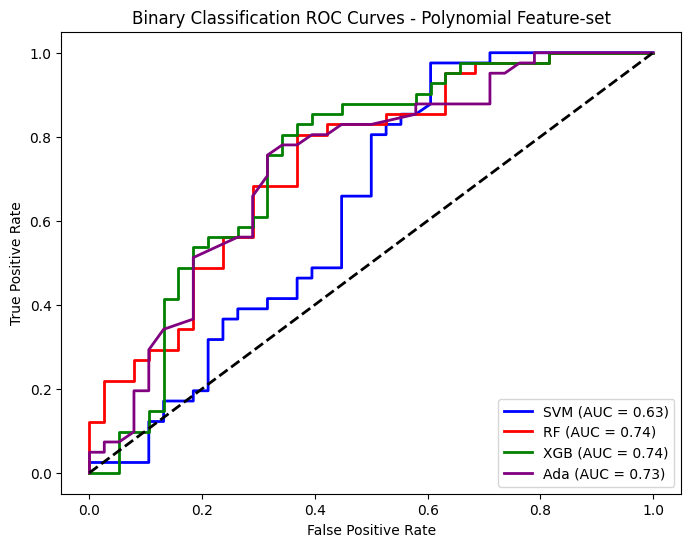

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test2).ravel()

# Update the plot_binary_roc function to use the binarized labels
def plot_binary_roc(y_true, y_pred_prob, model_label, color):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_label} (AUC = {roc_auc:.2f})')

# Continue with the plotting as before
color_cycle = cycle(['blue', 'red', 'green', 'purple'])

plt.figure(figsize=(8, 6))
#plot_binary_roc(y_test_binarized, y_pred_prob_gs1, 'LR', next(color_cycle))
plot_binary_roc(y_test_binarized, y_pred_prob_gs2, 'SVM', next(color_cycle))
plot_binary_roc(y_test_binarized, y_pred_prob_gs3, 'RF', next(color_cycle))
plot_binary_roc(y_test_binarized, y_pred_prob_gs4, 'XGB', next(color_cycle))
plot_binary_roc(y_test_binarized, y_pred_prob_gs5, 'Ada', next(color_cycle))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary Classification ROC Curves - Polynomial Feature-set')
plt.legend(loc="lower right")
plt.show()


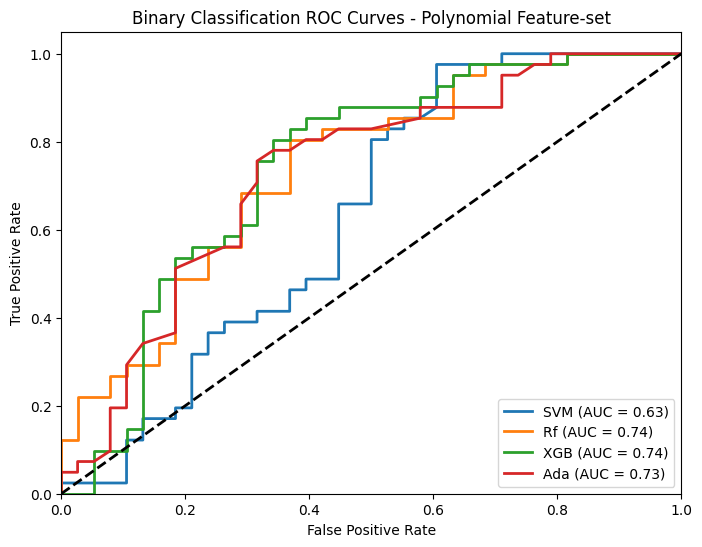

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve for each model
def plot_binary_roc_curve(y_true, y_score, ax, name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:0.2f})',
            linestyle='-', linewidth=2)

fig, ax = plt.subplots(figsize=(8, 6))

# Assuming y_test_binarized and your model score arrays (y_pred_prob1, y_pred_prob2, etc.) are defined
#plot_binary_roc_curve(y_test_binarized, y_pred_prob_gs1, ax, 'LR')
plot_binary_roc_curve(y_test_binarized, y_pred_prob_gs2, ax, 'SVM')
plot_binary_roc_curve(y_test_binarized, y_pred_prob_gs3, ax, 'Rf')
plot_binary_roc_curve(y_test_binarized, y_pred_prob_gs4, ax, 'XGB')
plot_binary_roc_curve(y_test_binarized, y_pred_prob_gs5, ax, 'Ada')

# Diagonal line for reference
ax.plot([0, 1], [0, 1], 'k--', lw=2)

# Set plot limits and labels
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Binary Classification ROC Curves - Polynomial Feature-set')
ax.legend(loc="lower right")

plt.show()


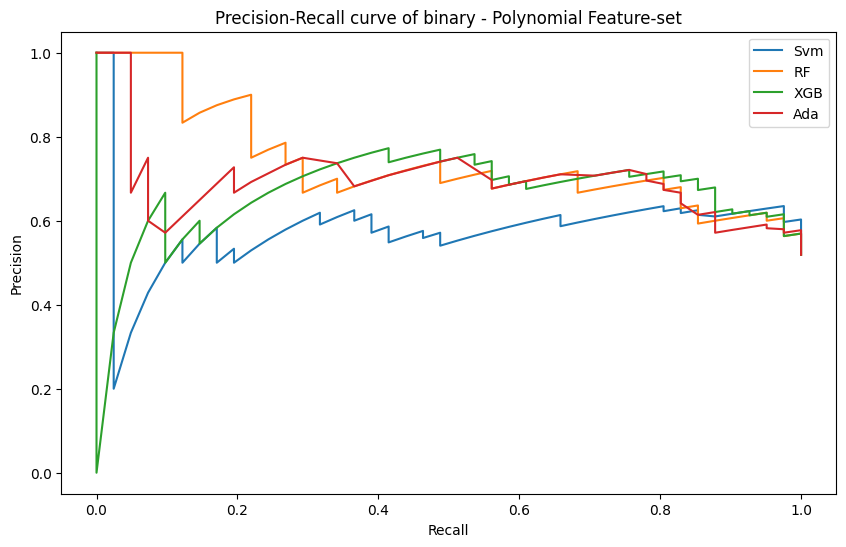

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for each model
precision_gs2, recall_gs2, _ = precision_recall_curve(y_test_gs2, y_pred_prob_gs2)
precision_gs3, recall_gs3, _ = precision_recall_curve(y_test_gs3, y_pred_prob_gs3)
precision_gs4, recall_gs4, _ = precision_recall_curve(y_test_gs4, y_pred_prob_gs4)
precision_gs5, recall_gs5, _ = precision_recall_curve(y_test_gs5, y_pred_prob_gs5)

# Plotting the precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_gs2, precision_gs2, label="Svm")
plt.plot(recall_gs3, precision_gs3, label="RF")
plt.plot(recall_gs4, precision_gs4, label="XGB")
plt.plot(recall_gs5, precision_gs5, label="Ada")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve of binary - Polynomial Feature-set")
plt.legend()
plt.show()


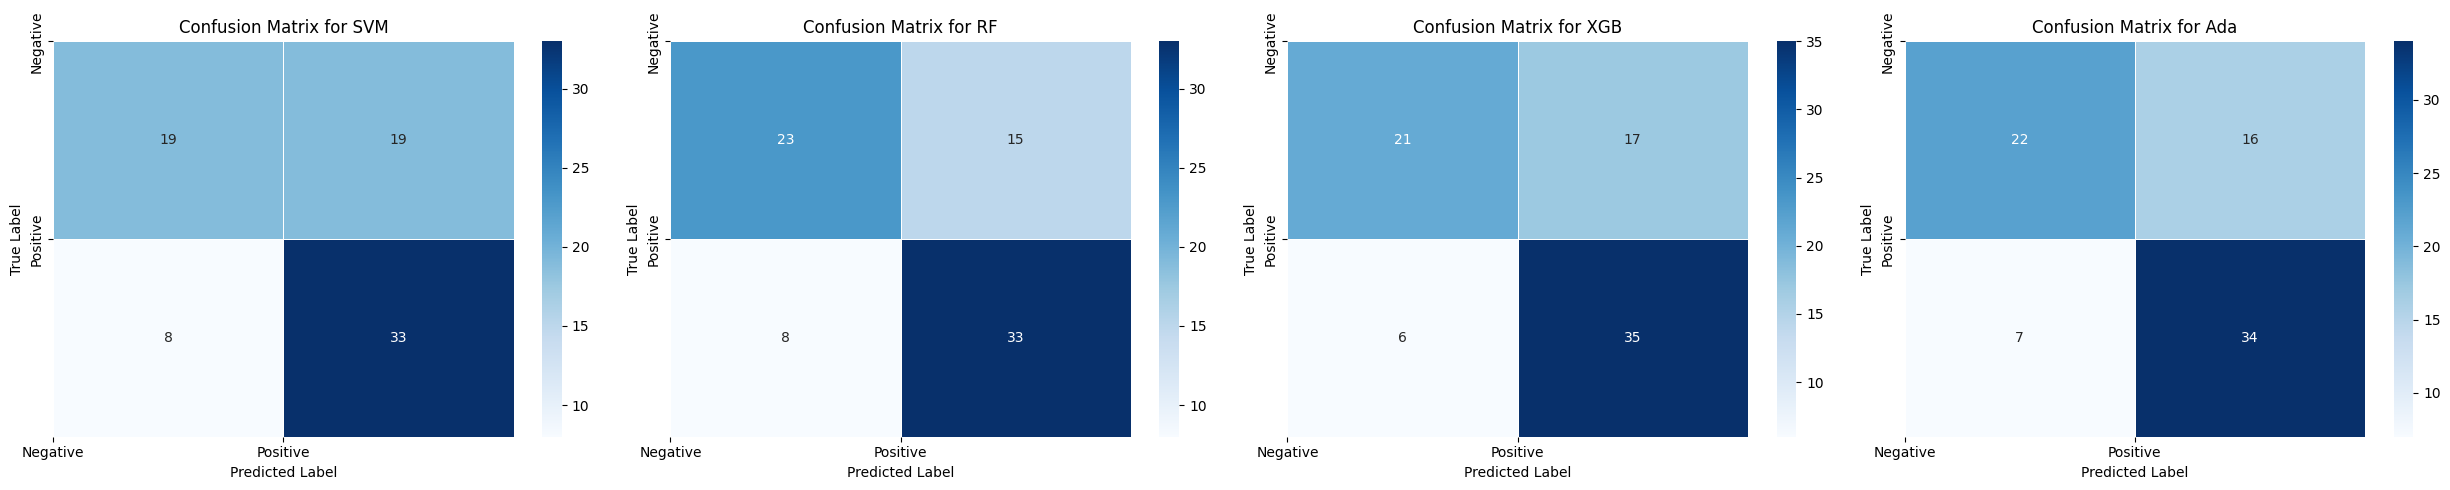

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, ax, model_name, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax, cmap=cmap)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    # Set the tick labels manually to avoid the FixedLocator error
    ax.set_xticks(np.arange(len(np.unique(y_true))))
    ax.set_yticks(np.arange(len(np.unique(y_true))))
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])

# Assuming you have a list of your true labels and predicted labels for each model
true_labels = [ y_test_gs2, y_test_gs3, y_test_gs4, y_test_gs5]
predicted_labels = [ y_pred_gs2, y_pred_gs3, y_pred_gs4, y_pred_gs5]
model_names = ['SVM', 'RF', 'XGB', 'Ada']

# Create a figure with subplots in a single row
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))  # Adjust the size as needed

# Plot each confusion matrix on its own subplot
for ax, y_true, y_pred, model_name in zip(axes, true_labels, predicted_labels, model_names):
    plot_confusion_matrix(y_true, y_pred, ax, model_name)

plt.tight_layout()
plt.show()
